# Time series visualization

## Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
%run ts_utilities.ipynb

Original

0     123
1     112
2     118
3     104
4     105
5     107
6     114
7     119
8     123
9     127
10    132
11    144
dtype: int64
Padded right

-2      0.0
-1      0.0
0     123.0
1     112.0
2     118.0
3     104.0
4     105.0
5     107.0
6     114.0
7     119.0
8     123.0
9     127.0
10    132.0
11    144.0
dtype: float64
Padded left

0     123.0
1     112.0
2     118.0
3     104.0
4     105.0
5     107.0
6     114.0
7     119.0
8     123.0
9     127.0
10    132.0
11    144.0
12      0.0
13      0.0
dtype: float64


## Testing data

In [2]:
dt1 = [123, 112, 118, 104, 105, 107, 114, 119, 123, 127, 132, 144]
dt2 = [145, 157, 162, 170, 173]
dt3 = [148, 152, 163, 170, 174]

idx = pd.DatetimeIndex(['2020-01-01', '2020-01-02','2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'])
ts1 = pd.Series(data = dt1, index=idx)
idxs = [0, 4, 6, 7, 12, 15, 18]
ts2 = pd.Series(data=dt1, index=range(len(dt1)))
ts3 = pd.Series(data=dt2, index=range(len(dt2)))

df = pd.DataFrame({'ts1' : ts2*2, 'ts2' : ts2})
df

,ts1,ts2
0,246,123
1,224,112
2,236,118
3,208,104
4,210,105
5,214,107
6,228,114
7,238,119
8,246,123
9,254,127


## Plot forecast

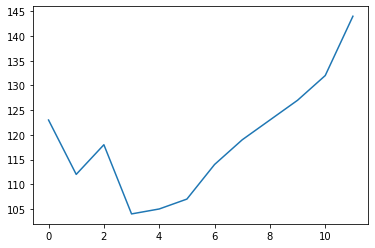

In [4]:
ts_hist=ts2
fcst=dt2
plt.plot(ts2)
idx = index=range(len(ts_hist), len(ts_hist)+len(fcst))
idx
ts_fcst = pd.Series(data=fcst, index=idx)

In [6]:
def gen_ts_fcst(ts_hist, fcst):
    idx = index=range(len(ts_hist), len(ts_hist)+len(fcst))
    return pd.Series(data=fcst, index=idx)

In [7]:
ts_hist=ts2
fcst=dt2

gen_ts_fcst(ts_hist, fcst)

12    145
13    157
14    162
15    170
16    173
dtype: int64

In [10]:
def plot_fcst(ts_hist, ts_fcst):
    tot = list(ts_hist) + list(ts_fcst)
    plt.plot(tot, color='r')
    plt.plot(ts_hist, color='b')
    plt.show()

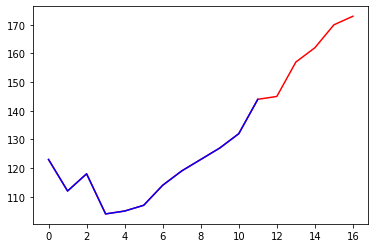

In [11]:
ts_hist=ts2
fcst=dt2

plot_fcst(ts_hist, ts_fcst)

In [20]:
def plot_fcst_valid(train, test, fcst):
    train_plus = add_value(train, test[0])
    nH = len(train_plus)
    nF = len(fcst)
    histIdx = range(len(train_plus))
    fcstIdx = range(len(train), len(train)+len(fcst))
    plt.figure()
    plt.plot(histIdx, train_plus, label='Train', Color='b', lw=1.)
    plt.plot(fcstIdx, test, label='Test', Color='g', lw=1.)
    plt.plot(fcstIdx, fcst, label='Fcst', Color='r', lw=1.)
    plt.legend(loc='best')
    plt.show()

In [21]:
train = ts2
test = dt3

plot_fcst_valid(train,test,fcst)

NameError: name 'add_value' is not defined

#### Plot highligted points in a time series

In [379]:
def get_bool_array(ts, idx):
    idxs_bin = idx2bin_array(idxs)
    idxs_bin = pd.Series(idxs_bin)
    idxs_bin_pad = pad(idxs_bin, len(ts)-len(idxs_bin) , left=True)
    return np.array(idxs_bin_pad).astype(np.bool)

idxs = [2,5]
get_bool_array(ts4, idxs)

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False])

In [381]:
def plot_high(ts, points):
    mask = get_bool_array(ts, points)
    xs = np.arange(len(ts4))
    plt.plot(xs, ts4, linestyle='-', color='blue')
    plt.plot(xs[mask], ts4[mask], ':', color='red', linewidth=0, marker='o')
    plt.show()

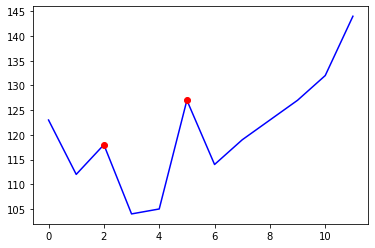

In [382]:
dt1 = [123, 112, 118, 104, 105, 127, 114, 119, 123, 127, 132, 144]
ts4 = pd.Series(data = dt1, index=idx)
idxs = [2,5]
plot_high(ts4, idxs)

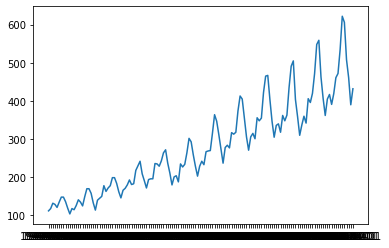

In [34]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

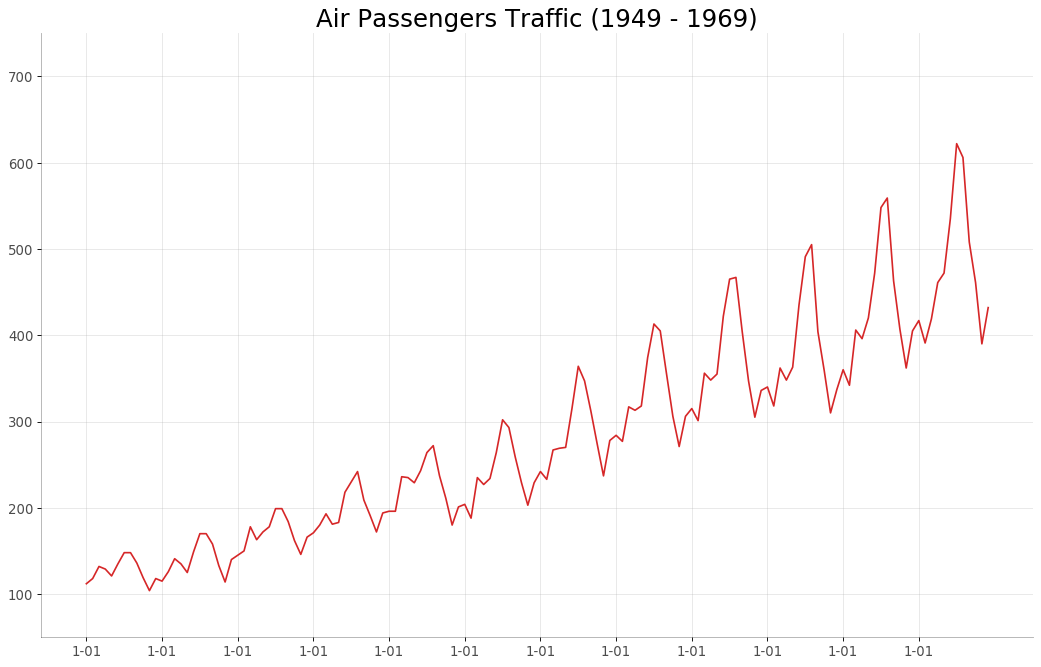

In [35]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot(df['date'], df['value'], color='tab:red')
# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

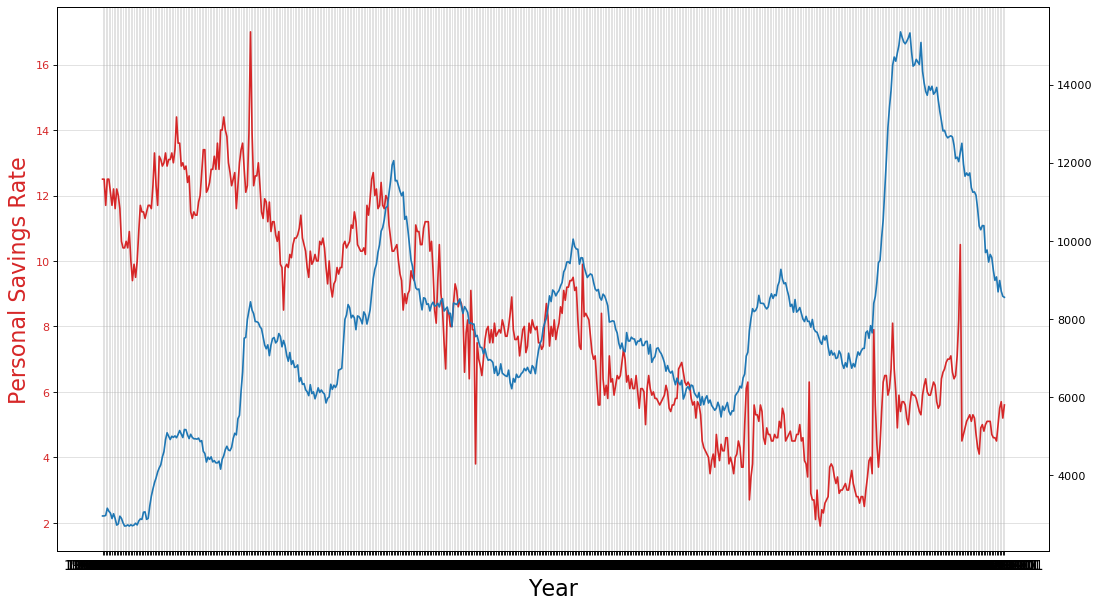

In [31]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

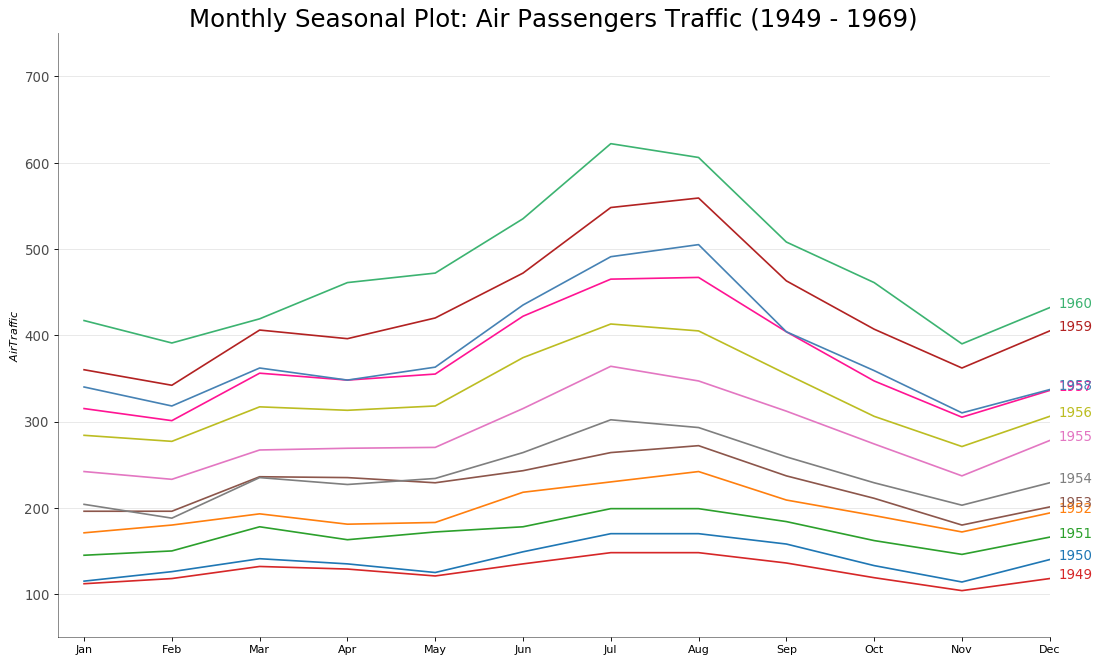

In [41]:
from dateutil.parser import parse 

# Import Data
#df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# Prepare data
df['year'] = [parse(d).year for d in df.date]
df['month'] = [parse(d).strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(16,10), dpi= 80)

for i, y in enumerate(years):
    dfy = df.loc[df.year==y, :]
    plt.plot(dfy['month'], dfy['value'], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.ylim(50,750)
plt.xlim(-0.3, 11)
plt.ylabel('$Air Traffic$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
# plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()